In [1]:
import pandas as pd
import statsmodels.api as sm
from poisson_utils import preprocess, evaluate_error, r_squared
import matplotlib.pyplot as plt
import datetime


In [2]:
df = pd.read_csv('nyc_taxi_data/train.csv')
df = preprocess(df)

/home/kor/Desktop/ravindu/poisson_utils.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.date
/home/kor/Desktop/ravindu/poisson_utils.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['pickup_datetime'], inplace=True)


Text(0, 0.5, 'Number of Rides')

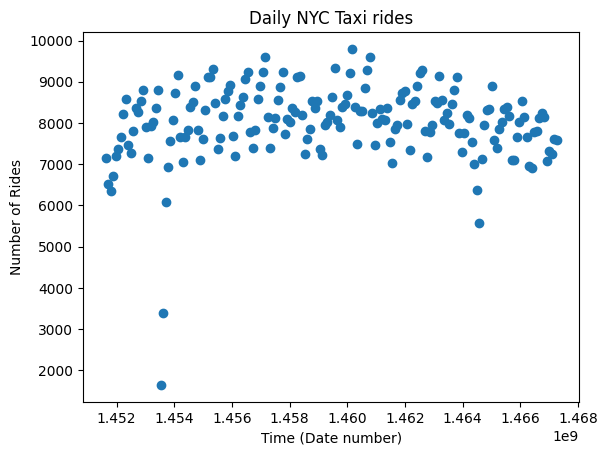

In [3]:
plt.scatter(df['timestamp'],df['count'])
plt.title('Daily NYC Taxi rides')
plt.xlabel('Time (Date number)')
plt.ylabel('Number of Rides')

In [4]:
#drop rows that have less than 6800 rides
df = df[df['count'] > 6800]

In [5]:
#find the stats of the df
df.describe()


,count,timestamp
count,174.000000,1.740000e+02
mean,8137.913793,1.459615e+09
std,642.478374,4.441770e+06
min,6910.000000,1.451624e+09
25%,7663.500000,1.455880e+09
50%,8132.500000,1.459613e+09
75%,8542.750000,1.463350e+09
max,9796.000000,1.467259e+09


Text(0, 0.5, 'Number of Rides')

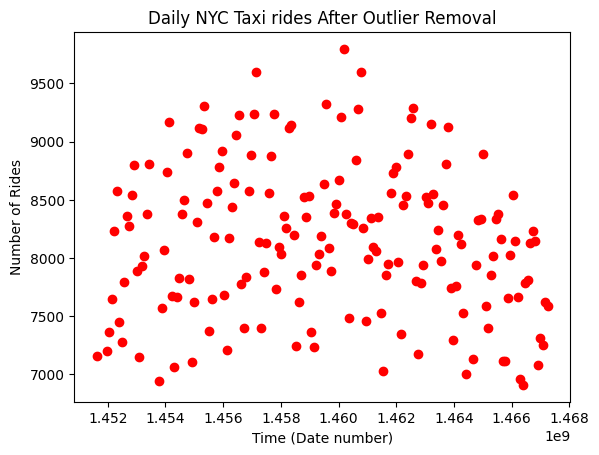

In [6]:
plt.scatter(df['timestamp'],df['count'], color='red')
plt.title('Daily NYC Taxi rides After Outlier Removal')
plt.xlabel('Time (Date number)')
plt.ylabel('Number of Rides')

In [7]:
# Calculate the number of rows for the training set (80% of the data)
train_size = int(len(df) * 0.8)

# Split the dataset into training and testing sets
df_train = df[:train_size]
df_test = df[train_size:]

In [8]:
# Fit a Poisson regression model to the data
model = sm.GLM(df_train['count'], sm.add_constant(df_train[['timestamp']]), family=sm.families.Poisson()).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                  139
Model:                            GLM   Df Residuals:                      137
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4122.7
Date:                Sun, 07 May 2023   Deviance:                       6737.2
Time:                        18:00:42   Pearson chi2:                 6.74e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.7105
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9335      0.387     10.159      0.000       3.175       4.692
timestamp   3.485e-09   2.66e-10     13.124      0.000    2.96e-09    4.01e-09
==============================================================================
"""

In [9]:
# Make predictions for the future dates using the Poisson regression model
future_counts = model.predict(sm.add_constant(df_test[['timestamp']]))

In [12]:
error = evaluate_error(df_test['count'], future_counts, metric='mae')
print('The Mean Squared Error of the model on the test set is:', error)

The Mean Squared Error of the model on the test set is: 702.6682053719423


In [13]:
r2 = r_squared(df_test['count'], future_counts)
print('The R-squared value of the model on the test set is:', r2)

The R-squared value of the model on the test set is: -1.7924853605282225
